# LAB 01 - DIGITAL IMAGE AND VIDEO PROCESSING

### Libraries included in this assignment

In [2]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import cv2

### Read image

In [3]:
def read_image():
    filename = input("Enter name of the file: ")
    
    img = Image.open(filename)
    img = img.convert('RGB')
    img = np.asarray(img)

    return img

img = read_image()

### Color transformation

##### Linear mapping
The image is converted to a 2D array containing pixels with RGB information. The linear mapping use the equation below to change brightness of the image:
$$
    g(x, y) = f(x, y) + brightness
$$
The algorithm will loop through all pixel of the image and add the R, G, B with the brightness coefficient.

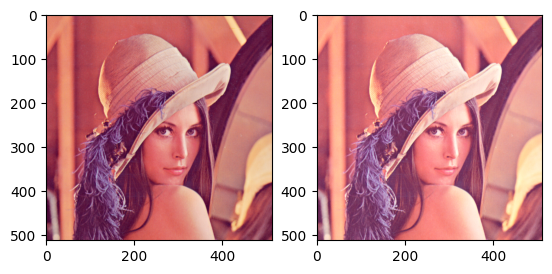

In [54]:
def change_brightness(img, brightness):
    new_img = np.zeros(img.shape, img.dtype)

    for y in range (img.shape[0]):
        for x in range (img.shape[1]):
            for z in range (img.shape[2]):
                new_img[y][x][z] = max(min(img[y][x][z] + brightness, 255), 0)
    
    return new_img

brightness = -101
while(brightness < -100 or brightness > 100):
    brightness = int(input("Invalid input! Brightness should be within -100 to +100"))

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(change_brightness(img, brightness))


Similar with linear mapping brightness modification, the algorithm will multiply the R, G, B of the pixel with the contrast coefficient:
$$
    g(x, y) = f(x, y) \times contrast
$$

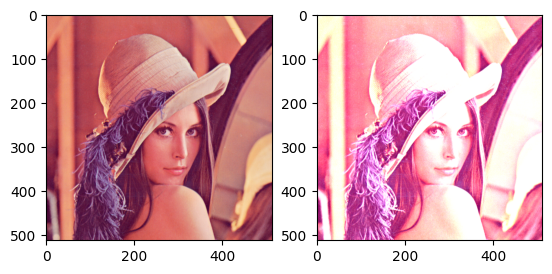

In [57]:
def change_brightness(img, contrast):
    new_img = np.zeros(img.shape, img.dtype)

    for y in range (img.shape[0]):
        for x in range (img.shape[1]):
            for z in range (img.shape[2]):
                new_img[y][x][z] = max(min(img[y][x][z] * contrast, 255), 0)
    
    return new_img

contrast = -1
while(contrast < 1 or contrast > 3):
    contrast = float(input("Invalid input! Brightness should be within 1.0 to 3.0"))
    
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(change_brightness(img, contrast))

##### Non-linear mapping
In non-linear mapping, we have to functions:
- Logarithmic mapping function:
$$
g(x, y) = c \times log(f(x, y))
$$
With c is the scaling constant, f(x, y) is the pixel of the image at coordinate (x, y)

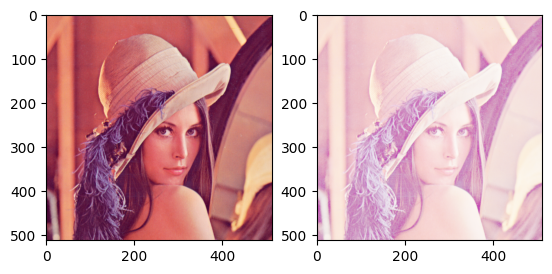

In [69]:
# Logarithmic mapping function implementation
def logarithmic_mapping(img, c):
    new_img = np.zeros(img.shape, img.dtype)

    for y in range (img.shape[0]):
        for x in range (img.shape[1]):
            for z in range (img.shape[2]):
                new_img[y][x][z] = c * np.log(img[y][x][z])

    return new_img

c = int(input("Please input the scaling constant"))
c = 255 / np.log(c + 255)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(logarithmic_mapping(img, c))

- Exponential mapping function
$$
g(x, y) = e^{f(x, y)}
$$

C:\Users\kimcu\AppData\Local\Temp\ipykernel_16920\2900778924.py:7: RuntimeWarning: overflow encountered in exp
  new_img[y][x] = np.clip(np.exp(img[y][x]), 0, 255)


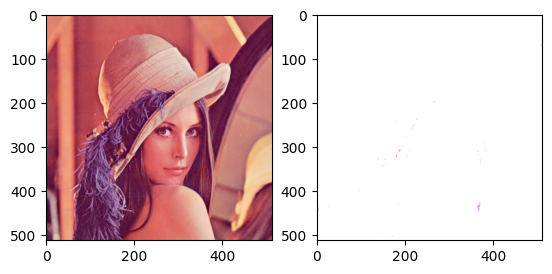

In [53]:
def exponential_mapping(img, alpha):
    new_img = np.zeros(img.shape, img.dtype)

    # Apply blur to each channel separately and add them together
    for y in range (img.shape[0]):
        for x in range (img.shape[1]):
            new_img[y][x] = np.clip(np.exp(img[y][x]), 0, 255)

    return new_img

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(exponential_mapping(img, 0.1))

### Geometric transformation

### Smoothing image
In smoothing image, the method used is the concept of convolution to apply the filter to the image. Convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel, or so called mask and filter. The kernel is a n x n matrix.
The implementation of the function to apply filter:

In [12]:
# Implementation of smoothing image algorithm
def apply_filter(img, kernel):
    new_img = np.zeros(img.shape, img.dtype)

    # Middle of the kernel
    offset = len(kernel) // 2

    # Apply blur to each channel separately and add them together
    for y in range (offset, img.shape[0] - offset):
        for x in range (offset, img.shape[1] - offset):
            R, G, B = 0, 0, 0
            for i in range (len(kernel)):
                for j in range (len(kernel)):
                    R += img[y + i - offset][x + i - offset][0] * kernel[i][j]
                    G += img[y + i - offset][x + i - offset][1] * kernel[i][j]
                    B += img[y + i - offset][x + i - offset][2] * kernel[i][j]

            new_img[y][x] = [R,G,B]

    return new_img

##### Averaging filter
In this method, we use box kernel for smoothing image. The kernel is defined by the matrix below:
$$
\frac{1}{9} \times 
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$

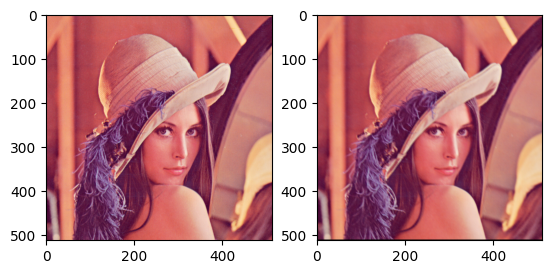

In [13]:
# Define kernel matrices for smoothing image
# box blur kernel
box_kernel = [[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]]

# Implement averaging filter
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(apply_filter(img, box_kernel))

##### Gaussian filter
The gaussian filter use below formula to define the kernel:
$$
g(x, y) = \sum_{m=1}^M \sum_{n=1}^N \times f(m, n) \times h(x-m, y-n)
$$

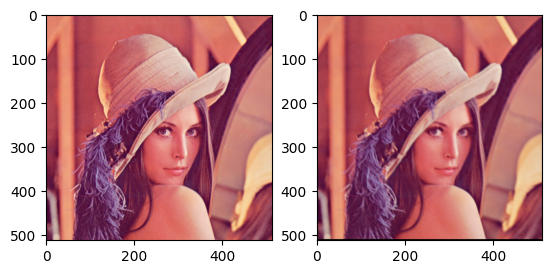

In [67]:
def gaussian_coefficient(x, y, sigma):
    return (1.0 / (2 * np.pi * (sigma**2))) * np.exp(- (x**2 + y**2) / (2 * sigma**2))

def gaussian_kernel(size, sigma):
    offset = int(size / 2)
    return [[gaussian_coefficient(x - offset, y - offset, sigma) for x in range(size)] for y in range(size)]

size = int(input("Please input size of the kernel"))
sigma = int(input("Please input sigma"))

# Create and apply the Gaussian filter
gaussian_kernel = gaussian_kernel(size, sigma)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(apply_filter(img, gaussian_kernel))

##### Median filter
Median filter use the kernel as a storage for sorting the pixel in ascending order. The algorithm will then get the median of the array and assign that median value to the pixel.
The algorithm use the equation below:
$$
g(x, y) = med\{f(x + i, y + j)| (i, j) ∈ O\}
$$

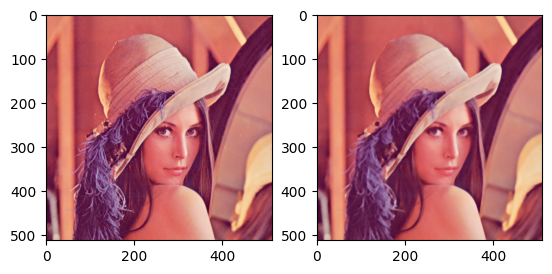

In [68]:
# Implementation of median filter
def median_filter(omg, kernel_size):
    new_img = np.zeros(img.shape, img.dtype)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Define the region of interest (ROI) for the current pixel
            roi = img[max(0, i - kernel_size//2):min(img.shape[0], i + kernel_size//2 + 1),
                              max(0, j - kernel_size//2):min(img.shape[1], j + kernel_size//2 + 1)]

            # Apply the median filter to each channel independently
            for c in range(img.shape[2]):
                new_img[i, j, c] = np.median(roi[:, :, c])

    return new_img

kernel_size = int(input("Please input the kernel size for median filter: "))

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(median_filter(img, kernel_size))